DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

#### **Solution**

In [410]:
# Loading important lib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [411]:
# Importing train & test datasets
train_data = pd.read_csv('./Datasets/train.csv')
test_data = pd.read_csv('./Datasets/test.csv')

In [412]:
print('Train Data',train_data.shape)
print('Test Data',test_data.shape)

Train Data (4209, 378)
Test Data (4209, 377)


In [413]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


#### **#. Removing variable(s) having zero vaiance.**
#### Checking variance

In [414]:
variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()

zero_var = []
for key, value in variance.items():
    if(value==0):
        print('Column: ',key)
        zero_var.append(key)
print('No of columns which has zero variance = ',len(zero_var))

Column:  X11
Column:  X93
Column:  X107
Column:  X233
Column:  X235
Column:  X268
Column:  X289
Column:  X290
Column:  X293
Column:  X297
Column:  X330
Column:  X347
No of columns which has zero variance =  12


/var/folders/5k/yp3_f__53c38cdrv0bkcgx4m0000gn/T/ipykernel_1343/1253409149.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()


In [415]:
# Droping Columns having zero variance
train_data = train_data.drop(columns=zero_var)
train_data.shape

(4209, 366)

In [416]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


#### **#. Checking for null and unique values for test and train sets.**

In [417]:
# Checking in Train Data
train_data.isna().sum().any()

False

In [418]:
# Checking ion Test Data
test_data.isna().sum().any()

False

#### **#. Applying label encoder**

In [419]:
from sklearn.preprocessing import LabelEncoder

In [420]:
train_features =  train_data.drop(columns={'ID','y'})
train_target = train_data.y
train_features.shape

(4209, 364)

In [421]:
for i in train_features.describe(include='object').keys():
    le = LabelEncoder()
    train_features[i] = le.fit_transform(train_features[i])

In [422]:
# Label Encoded Features
train_features

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **#. Performing dimensionality reduction.**

In [423]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [424]:
train_feature_pca = pca.fit_transform(train_features)
train_feature_pca.shape

(4209, 6)

#### **#. Predicting on Test Data by XGBoost**

In [425]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [426]:
x_train,x_test,y_train,y_test = train_test_split(train_feature_pca,train_target,test_size=0.3,random_state=7)
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
)

(2946, 6) (1263, 6) (2946,) (1263,)


In [427]:
xgb_reg = XGBRegressor()

In [428]:
gbm_param = {
    'n_estimators': [40, 50, 60, 80],
    'max_depth':[3,6,9],
    'learning_rate': [.001, .0001, .002, .03, .01, .02, .3],
    'lambda': [.001, .0001, .002, .03, .01, .02, .3],
    'alpha': [.001, .0001, .002, .03, .01, .02, .3]

}


In [429]:
rscv = RandomizedSearchCV(estimator=xgb_reg,param_distributions=gbm_param, n_iter=20,n_jobs=-1)

In [430]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=N

In [431]:
rscv.best_estimator_

XGBRegressor(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', lambda=0.002, learning_rate=0.3,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=40, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.00999999978, reg_lambda=0.00200000009,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [432]:
rscv.best_params_

{'n_estimators': 40,
 'max_depth': 6,
 'learning_rate': 0.3,
 'lambda': 0.002,
 'alpha': 0.01}

In [433]:
xgb_model = rscv.best_estimator_

In [434]:
print('RMSE = ',sqrt(mean_squared_error(y_test,xgb_model.predict(x_test))))

RMSE =  11.148904252678287


##### **Preparing test dataset**

In [435]:
# droping zero variance features
test_variance = pow(test_data.drop(columns={'ID'}).std(),2).to_dict()

test_zero_var = []
for key, value in test_variance.items():
    if(value==0):
        print('Column: ',key)
        test_zero_var.append(key)
print('No of columns which has zero variance = ',len(test_zero_var))

Column:  X257
Column:  X258
Column:  X295
Column:  X296
Column:  X369
No of columns which has zero variance =  5


/var/folders/5k/yp3_f__53c38cdrv0bkcgx4m0000gn/T/ipykernel_1343/3644156715.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_variance = pow(test_data.drop(columns={'ID'}).std(),2).to_dict()


In [436]:
# Droping Columns having zero variance
test_data = test_data.drop(columns=test_zero_var)
test_data.shape

(4209, 372)

In [437]:
# Checking for null 
test_data.isnull().sum().any()

False

In [438]:
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 371)


#### Applying Label Encoder

In [439]:
test_data_feature.describe(include='object')


,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [440]:
for i in test_data_feature.describe(include='object').keys():
    le = LabelEncoder()
    test_data_feature[i] = le.fit_transform(test_data_feature[i])

#### Reducing Dimensione

In [441]:
pca_test = PCA(n_components=.95)
test_feature_pca = pca.fit_transform(test_data_feature)
test_feature_pca.shape

(4209, 6)

#### **#. Predicting test_df values using XGBoost.**

In [442]:
test_pred = xgb_model.predict(test_feature_pca)
test_pred

array([ 77.98937,  90.8607 ,  80.54468, ...,  98.67016, 106.69238,
        95.30081], dtype=float32)

In [443]:
df = pd.DataFrame()

df['ID'] = test_data['ID']
df['Y'] = test_pred
df

,ID,Y
0,1,77.989372
1,2,90.860703
2,3,80.544678
3,4,82.351433
4,5,111.641144
...,...,...
4204,8410,102.400261
4205,8411,106.546768
4206,8413,98.670158
4207,8414,106.692383


/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


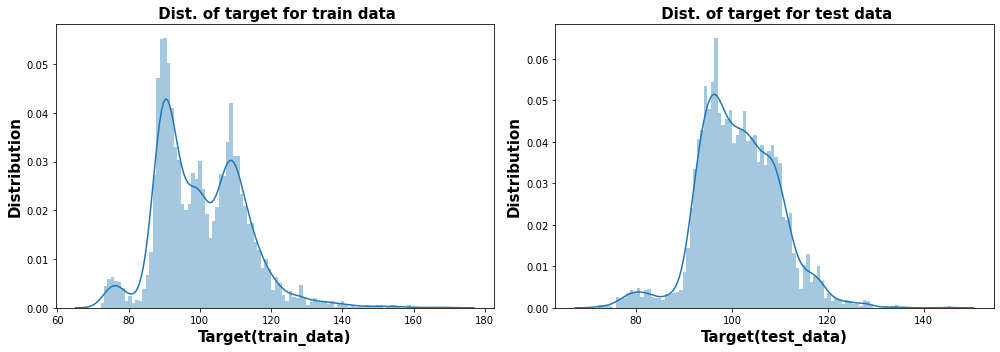

In [444]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_target[train_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)


plt.tight_layout()